In [1]:
!pip install pyarrow
#Parquet dosyalarını açabilmek için kütüphane yüklemesi

import pandas as pd
#Pandas kütüphanesini içe aktarmak

import pyarrow

df = pd.read_parquet("full-00000-of-00001.parquet")
#Parquet dosyasını okuma tabloya çevirme
df.head()
#İlk 5 satırı ekrana yazdır

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [2]:
df.shape
#Veri setinde kaç satır ve sütun var?

(112590, 16)

112.590 satır var, yani veri setinde 112.590 farklı ürün kaydı (çok iyi bir örneklem)

16 sütun var her ürün için başlık, kategori, açıklama, özellikler gibi 16 farklı bilgi alanı mevcut

In [3]:
df.info()
#Sütunların isimlerini ve tiplerini öğrenmek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            112590 non-null  object 
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       object 
 14  subtitle         0 non-null       object 
 15  author           0 non-null       object 
dtypes: float64(1), int64(1), object(14)
me

Bu veri setinde 16 farklı sütun var

Her satırda bu 16 alanın tamamı dolu, yani eksik bilgi yok

Çoğu alan yazı türünde (object)

Bazı alanlar ise odalıklı sayı (float64) ve tam sayı (int64)

Bu bilgilerveriyi daha iyi tanımamıza ve sonraki analizleri doğru yapmamıza yardımcı olur

In [4]:
df.isnull().sum()
#Eksik veri var mı kontrolü

,0
main_category,0
title,0
average_rating,0
rating_number,0
features,0
description,0
price,0
images,0
videos,0
store,11331


Verimizde genel olarak eksik yok

Tamamen boş olan sütunları silmeye gerek yok, çünkü zaten analizde kullanmayacağız

Eksik olan store sütunu bazı ürünler için önemli olmayabilir bu yüzden burayı da dikkate almayabiliriz

In [5]:
df["title"].sample(5)
#Veri setindeki ürün başlıklarından rastgele 5 tanesini gösterme
#Üretken yapay zeka kısmında bu başlıklardan açıklama üreteceğiz
#Başlıklar anlamlı mı yeterince bilgi içeriyor mu bunu göreceğiz

df["main_category"].value_counts()
#Her kategoriden kaç tane ürün olduğunu metinsel olarak gösterme
#Makine öğrenmesinde yeterince örnek olmayan sınıflar düşük başarı getirir
#Hangi kategoriler ağırlıklı hangileri çok az bunu anlıyoruz


,count
main_category,
All Beauty,112135
Premium Beauty,455


Veri setindeki ürünlerin neredeyse tamamı (%99'u) All Beauty kategorisine ait, sadece 455 ürün, Premium Beauty kategorisinde yer alıyor veriler çok dengesiz

Premium Beauty kategorisi çok az sayıda ürün içerdiği için üretilecek açıklamalar bu kategori için yetersiz çeşitlilikte olabilir

Eğer kategori tahmini yapılacaksa, model çoğunluk sınıfa eğilimli olur yani hep "All Beauty" der

Bu dengesizlik farkındalığı, model eğitimi ve yorumlama sürecinde göz önünde bulunduracağız

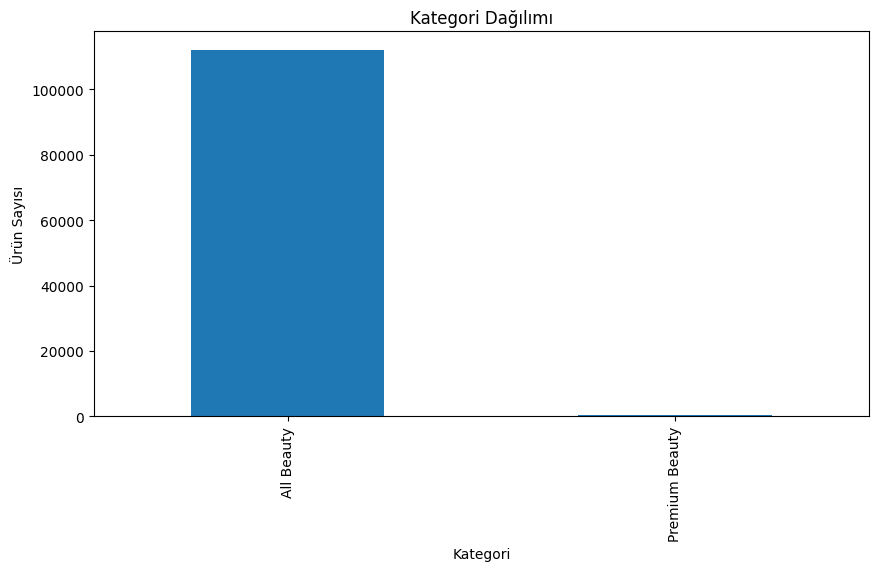

In [6]:
import matplotlib.pyplot as plt
#Görselleştirme için matplotlib kütüphanesini içe aktarma

df["main_category"].value_counts().plot(kind='bar', figsize=(10, 5))
#Kategorilere göre ürün sayılarını çubuk grafik (bar chart) olarak görselleştir
#Bar grafiğin tipi ve boyutu ayarlaması

plt.title("Kategori Dağılımı")
#Grafik başlığını ayarla

plt.xlabel("Kategori")
plt.ylabel("Ürün Sayısı")
#X ve Y ekseni etiketlerini ayarla

plt.show()
#Grafiği göster

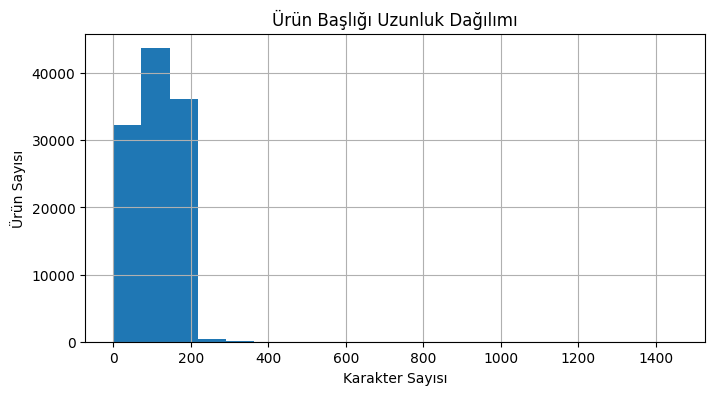

In [7]:
df["title_length"] = df["title"].astype(str).apply(len)
#Her bir ürün başlığının karakter uzunluğunu hesaplama ve yeni bir sütuna kaydetme

df["title_length"].hist(bins=20, figsize=(8,4))  #20 aralığa (bin) bölerek çizim yapar
#Başlık uzunluklarının histogram grafiğini çizme

plt.title("Ürün Başlığı Uzunluk Dağılımı")
plt.xlabel("Karakter Sayısı")
plt.ylabel("Ürün Sayısı")
#Grafik başlığı ve eksen adlarını belirleme

plt.show()
#Grafiği göster

Ürün başlıklarının büyük çoğunluğu 50–200 karakter arasında

Çok uzun başlıklar (300+ karakter) oldukça nadir. Bunlar aykırı değer (outlier) olabilir

In [8]:
df[df["title_length"] > 300]["title"].sample(5)
#Çok uzun başlıklara örnek bakma
#Başlığı aşırı uzun olan ürünleri örnekleme ile inceleyerek anlamlılık kontrolü yapıyoruz

,title
35145,100% Natural Moroccan Rhassoul (Ghassoul) Clay...
59059,CJ E&M Block B - Re:Montage (6th Mini Album Re...
31626,Professional Makeup Brush Set By DollFace - 5 ...
44043,"Aloe Vera Gel, HUGE 16 Oz. From Organic, Cold ..."
25696,Springs Organic Vitamin C Serum For Your Face ...


Bazı ürünlerin başlıkları çok uzun 300 karakterin üzerinde

Bu uzun başlıklarda genellikle sadece ürün adı değil, yanında ne işe yaradığı, bazı açıklamalar ve hatta aramalarda çıkmak için ek kelimeler de yazılmış oluyor

Bu kadar fazla bilgi, yapay zeka modeli için kafa karıştırıcı olabilir çünkü her başlık aynı yapıda değil

Ama bu kadar uzun başlık çok az sayıda olduğu için model üzerinde büyük bir sorun yaratmayabilir

In [9]:
print("Ortalama uzunluk:", df["title_length"].mean())
print("Medyan uzunluk:", df["title_length"].median())
print("Maksimum uzunluk:", df["title_length"].max())
# Üretici yapay zeka modeline girilecek başlıkların çoğu makul uzunlukta mı? Çok uzunları temizlemeli miyiz? Buna karar vermek için inceliyoruz

Ortalama uzunluk: 113.57950084376942
Medyan uzunluk: 114.0
Maksimum uzunluk: 1455


Veri setindeki başlıkların büyük çoğunluğu düzgün uzunlukta. Sadece birkaç tane çok uzun başlık var ama sayıları o kadar az ki modeli bozmaz. O yüzden şimdilik temizlemeye gerek yok direkt kullanabiliriz

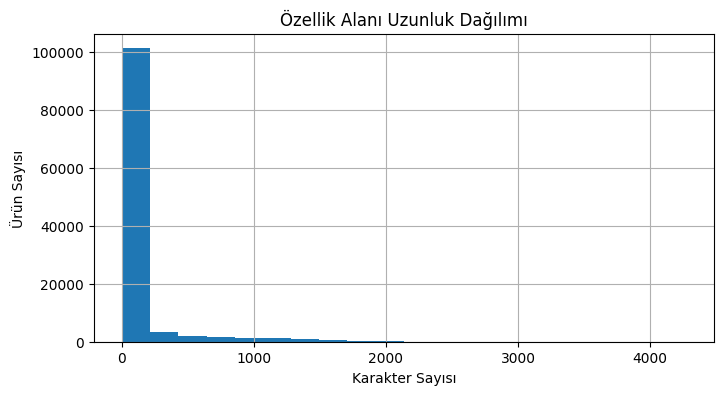

In [10]:
#Özellik ve açıklama metinlerinin karakter uzunluklarını hesaplayıp ayrı sütunlara kaydetme

df["features_length"] = df["features"].astype(str).apply(len)
#Her bir ürünün "features" alanındaki metnin uzunluğunu karakter bazında hesaplama

df["description_length"] = df["description"].astype(str).apply(len)
#Her bir ürünün "description" alanındaki metnin uzunluğunu karakter bazında hesaplama

#"features_length" sütunundaki değerlerin dağılımını histogram ile görselleştir

df["features_length"].hist(bins=20, figsize=(8,4))
#Histogram grafiğini çiz 20 eşit aralığa böl ve boyutunu ayarla (8 genişlik, 4 yükseklik)

plt.title("Özellik Alanı Uzunluk Dağılımı")
#Grafik başlığını ayarlama

plt.xlabel("Karakter Sayısı")
#X eksenini etiketle (karakter sayısı)

plt.ylabel("Ürün Sayısı")
#Y eksenini etiketle (bu uzunlukta kaç ürün var)

plt.show()
#Grafiği göster


Ürünlerin features (özellikler) alanında girilen metinlerin büyük bir kısmı 100 karakterin altında

Çok az sayıda ürünün özellik alanı 1000 karakteri aşıyor

Bu durum veri setindeki çoğu ürün için bu alanın çok kısa ya da boş olduğunu gösteriyor

Özellik alanının kısa olması üretken yapay zekanın açıklama üretirken yeterince bağlam verisi bulamamasına neden olabilir

Bu nedenle, model eğitimi sırasında bu alanın varlığına ve kalitesine dikkat edilmesi faydalı olur

In [11]:
df = df[df["description"].astype(str).str.strip() != ""]
#Description alanı boş olan ürünleri filtrele (sadece dolu olanları al)
#Üretken yapay zeka modelimiz açıklama (description) üreteceği için açıklaması tamamen boş olan ürünler bizim için anlamlı bir veri taşımaz

In [12]:
df = df[df["title_length"] > 10]
#Çok kısa başlıkları çıkarma (10 karakterden az)

df = df[df["title_length"] < 300]
#Çok uzun başlıklar model için zararlı olabilir çok uzun başlıkları çıkarma (300'den fazla olanlar)

In [13]:
df = df[df["description"].astype(str).str.strip() != ""]
#Boş açıklamaları (description) filtrele

Boş açıklamalar model için yetersiz örnek olur hatta hatalı öğrenmeye neden olabilir bu yüzden description alanı boş olan satırları veri setimizden çıkardık

In [14]:
#Model giriş ve çıkışlarını belirleme

X = df["title"]              #Girdi (Ürün başlığı, modelin öğrenmesini istediğimiz alan)
y = df["description"]        #Hedef (Açıklama, modelin tahmin etmesini istediğimiz alan)
category = df["main_category"]  #Ek bilgi olarak kategori (sınıflandırma yaparken kullanılabilir)

Model için verimiz artık hazır

Öncelikle verileri tanıdım neler var neler yok diye baktım

Eksik veya bozuk veri var mı kontrol ettim gerekirse bazılarını temizledim

Ürün başlıklarının çok kısa veya çok uzun olanlarını eledim çünkü modelin kafasını karıştırabilir

Açıklama (description) ve özellikler (features) alanlarına da baktım içerikleri yeterli mi kontrol ettim

Şimdi elimde daha sade temiz ve anlamlı bir veri seti var

Girdi olarak ürün başlığını kullanacağım (X)

Modelin üretmesini istediğim şey ürünün açıklaması olacak (y)

İsteğe bağlı olarak ürünün kategorisini de alabilirim (main_category)

In [15]:
!pip install transformers

In [16]:
from transformers import pipeline
#pipeline fonksiyonu Hugging Face’te eğitilmiş modelleri kolayca kullanmamızı sağlar

#Başlıktan açıklama üretmek için text2text-generation pipeline'ı tanımlıyoruz
gen_model = pipeline("text2text-generation", model="t5-small")
#t5-small metinden metin üretme konusunda başarılı küçük bir modeldir. Eğitimli olduğu için ekstra eğitmeye gerek yoktur
#gen_model adını verdiğimiz bu modelle başlık verip açıklama alabileceğiz

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [17]:
import pandas as pd

sample_titles = df["title"].dropna().sample(5).tolist()
#Temiz veriden 5 başlık seç (NaN olmayanlardan)
#dropna() boş başlık varsa çıkarıyor
#sample(5) rastgele 5 başlık alıyor

generated_descriptions = [gen_model("generate description: " + title)[0]["generated_text"] for title in sample_titles]
#Her başlık için açıklama üret
#gen_model() T5 modeliyle açıklama üretiyor

results = pd.DataFrame({
    "Ürün Başlığı": sample_titles,
    "Üretilen Açıklama": generated_descriptions
    #Sonuçları bir tabloda birleştir
    #DataFrame sonuçları tablo şeklinde gösteriyor
})

results
#Tabloyu göster

,Ürün Başlığı,Üretilen Açıklama
0,Moresoo U Tip Fusion Hair Extensions Human Hai...,: Moresoo U Tip Fusion Hair Extensions Human H...
1,EKLOEN 12PCS/9PCS/6PCS Multifunctional Headban...,Beschreibung: EKLOEN 12PCS/9PCS/6PCS Multifunc...
2,Cecycocy Straight Clip in Hair Extensions Huma...,: Cecycocy Straight Clip in Hair Extensions Hu...
3,Dare to Wear METALLUX Nail Polish 0.5oz/15mL -...,gener gener a description: Dare to Wear METALL...
4,"Conair Styling Essentials Brown Hair Net, 3 pi...",Generieren Sie eine Beschreibung: Conair Styli...


Açıklamanın İngilizce olması gerekiyordu ama Almanca kelime geldi demek ki model her zaman sadece İngilizce üretmiyor

Üretilen açıklamalar çoğunlukla başlığın aynısını tekrar ediyor yani moodel açıklama yazmamış sadece başlığı kopyalamış gibi

Açıklama yazdı ama ürün hakkında daha fazla detay beklerdim ne işe yaradığını anlatmamış

Bu model basitmiş daha büyük bir model denesem daha iyi açıklama yazar mı acaba?

Ya daha güçlü bir model denemeliyim ya da bu modele ne beklediğimi özel olarak öğretmeliyim

In [18]:
#Gerekli kütüphaneleri içe aktarma

from sklearn.model_selection import train_test_split
#Veri setini eğitim ve test olarak ikiye bölme

from sklearn.feature_extraction.text import TfidfVectorizer
#Metin verisini (ürün başlığı gibi) sayısal verilere dönüştürmek için kullanılır
#TF-IDF yöntemiyle önemli kelimeleri daha anlamlı hale getirme

from sklearn.linear_model import LogisticRegression
#Sınıflandırma (kategori tahmini) yapmak için basit ve etkili bir model

from sklearn.metrics import classification_report
#Modelin başarısını ölçmek için kullanılır
#Her kategori için doğruluk (precision), hatırlama (recall), F1 skoru gibi sonuçları verir

In [19]:
#Giriş verisi olarak ürün başlıklarını kullanıyoruz
#Yani model bu başlıklara bakarak hangi kategoriye ait olduğunu tahmin etmeye çalışacak
X = df["title"]

y = df["main_category"]
#Hedef değişken (tahmin edilmek istenen değer) olarak ana kategoriyi kullanılıyoruz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Veriyi eğitim ve test olarak ikiye ayırıyoruz
#test_size=0.2 verinin %20'si test %80'i eğitim için kullanılır
#random_state=42 sonuçların tekrar üretilebilir olması için sabit bir rastgelelik sağlar

In [20]:
# TF-IDF yöntemiyle metinleri sayısal vektörlere dönüştürme

vectorizer = TfidfVectorizer(max_features=5000)
#En sık geçen 5000 kelimeyle çalış

X_train_tfidf = vectorizer.fit_transform(X_train)
#Eğitim verisine göre öğren ve dönüştür

X_test_tfidf = vectorizer.transform(X_test)
#Test verisini aynı dönüşüme uygula

In [21]:
# Lojistik Regresyon modelini oluşturma.
#Bu model ürün başlığından hangi kategoriye ait olduğunu tahmin etmeye çalışacak

model = LogisticRegression(max_iter=1000)
#Gerekirse maksimum iterasyon sayısını artır
#Modelin öğrenmesi uzun sürerse daha çok deneme yapabilsin diye 1000 kez tekrar etmesine izin veriyoruz

model.fit(X_train_tfidf, y_train)
#Modeli eğitim verisiyle eğit
#Yani başlık verileri (X_train_tfidf) ile o başlıkların hangi kategoriye ait olduğunu (y_train) gösteriyoruz
# Böylece model bu eşleşmeleri öğreniyor

y_pred = model.predict(X_test_tfidf)
#Test verisi üzerinde tahmin yap
#Artık eğitilen modelimize yeni başlıklar veriyoruz (X_test_tfidf) ve onların hangi kategoriye ait olduğunu tahmin etmesini istiyoruz
#Tahmin edilen sonuçları y_pred değişkenine kaydediyoruz

In [22]:
import pandas as pd

#Parquet dosyasını doğru şekilde pandas ile okuma
df = pd.read_parquet('full-00000-of-00001.parquet')

df.head()  # İlk 5 satırı göster, veri geldi mi kontrol et


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [23]:
from sklearn.metrics import classification_report

#Modelin test verisi üzerindeki performansını ölçme
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

    All Beauty       1.00      1.00      1.00     22367
Premium Beauty       1.00      0.05      0.10        92

      accuracy                           1.00     22459
     macro avg       1.00      0.53      0.55     22459
  weighted avg       1.00      1.00      0.99     22459



Model, "All Beauty" sınıfını çok iyi tahmin etmiş çünkü veri setinin büyük kısmı bu sınıfa ait

"Premium Beauty" sınıfında başarı çok düşük model bu sınıfı neredeyse hiç öğrenememiş

Veride ciddi bir dengesizlik var bu da modelin azınlık sınıfı tanıyamamasına neden olmuş

Genel doğruluk yüksek görünse de makro F1 skoru düşük yani model gerçekte iyi performans göstermiyor

(Precision-Kesinlik:Bir sınıf için yapılan doğru tahminlerin, o sınıfa yapılan tüm tahminlere oranı)

(Recall-Duyarlılık:O sınıfa ait gerçek örneklerin ne kadarını doğru tahmin etmiş?)

(F1Score-Denge Scoru: Precision ve recall değerlerinin dengeli ortalaması)

(Support-Örnek Sayısı: Gerçek veri setinde her sınıftan kaç örnek var?)

(Accuracy-Doğruluk:Tüm veride modelin doğru tahmin ettiği oran. Bu, sadece çoğunluk sınıfını tahmin ettiği için böyle yüksek. Dengesiz veri nedeniyle bu yanıltıcı olabilir)

(Macro Avg- Makro Ortalama: Her sınıfın metriklerinin basit ortalaması. Dengesizliği dikkate almaz. f1-score = 0.55 Azınlık sınıf kötü tanındığı için düşük çıkmış)

(Weighted Avg-Ağırlıklı Ortalama: Her sınıfın örnek sayısına göre ağırlıklı ortalaması. Dengesizliği dikkate alır. f1-score = 0.99 Çoğunluk sınıf çok iyi tahmin edildiği için yüksek)



In [24]:
from sklearn.linear_model import LogisticRegression
#Lojistik regresyon modelini içe aktarıyoruz sınıflandırma için

from sklearn.metrics import classification_report
#Modelin başarımını ölçmek için kullanılan fonksiyonu içe aktarıyoruz

balanced_model = LogisticRegression(max_iter=1000, class_weight="balanced")
#Lojistik regresyon modelini oluşturuyoruz
#max_iter=1000 Modelin öğrenmesi için maksimum 1000 deneme hakkı veriyoruz
#class_weight="balanced" Az örneği olan sınıflara otomatik olarak daha fazla önem verilmesini sağlıyoruz

balanced_model.fit(X_train_tfidf, y_train)
#Modeli eğitiyoruz (öğretiyoruz)
#X_train_tfidf → Başlıkların sayısal karşılığı (eğitim verisi)
#y_train → Başlıkların ait olduğu kategoriler

y_pred_balanced = balanced_model.predict(X_test_tfidf)
#Eğitilen modeli test ediyoruz
#Model daha önce görmediği başlıklara bakarak kategori tahmini yapıyor
#Tahmin edilen kategoriler y_pred_balanced içine kaydediliyor

print(classification_report(y_test, y_pred_balanced))
#Gerçek test verisi etiketleri (y_test) ile modelin tahminlerini (y_pred_balanced) karşılaştırıyoruz
#Her bir sınıf için precision, recall, f1-score gibi başarı metriklerini yazdırıyoruz

                precision    recall  f1-score   support

    All Beauty       1.00      0.97      0.99     22367
Premium Beauty       0.08      0.58      0.15        92

      accuracy                           0.97     22459
     macro avg       0.54      0.77      0.57     22459
  weighted avg       0.99      0.97      0.98     22459



Model artık azınlık sınıfı "Premium Beauty" tanıyabiliyor

Önceki model bu sınıfı hiç öğrenememişti (recall = 0.05), şimdi recall = 0.58 oldu

Yani artık Premium Beauty sınıfındaki örneklerin %58’ini doğru tanıyor

Precision (kesinlik) değeri 0.08

Yani Premium Beauty olarak tahmin ettiği örneklerin çoğu aslında yanlış

Ama bu çok normal çünkü örnek sayısı çok az model denemeye başlamış demektir

All Beauty sınıfı için biraz performans kaybı oldu ama hâlâ çok yüksek Önceden %100 doğru tahmin ediyordu şimdi %97 tahmin ediyor

Daha adil bir model macro avg yani sınıf başına ortalama F1-Score 0.55 → 0.57 oldu

Çok artmamış gibi görünebilir ama artık iki sınıfı da dikkate alan bir model var

Genel doğruluk (accuracy) %97 başlık verisiyle kategori tahmini hâlâ oldukça başarılı

Yalnızca class_weight='balanced' kullanarak model dengesiz veri sorununa karşı daha duyarlı hâle geldi

Modelin az örneği olan sınıfı hiç görmezden gelmesi yerine artık onu da öğrenmeye çalıştığını görüyoruz

In [25]:
!pip install imbalanced-learn
#SMOTE işlemini yapabilmek için gerekli olan kütüphane

from imblearn.over_sampling import SMOTE
#SMOTE sınıfını kullanmak için içe aktardık

In [26]:
smote = SMOTE(random_state=42)
#Rastgelelik sabit olsun diye random_state belirliyoruz

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_tfidf, y_train)
#Eğitim verisini dengelemek için SMOTE uyguluyoruz
#X_train_tfidf: Girdi verisi (sayısallaştırılmış başlıklar)
#y_train: Etiketler (kategoriler)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_oversampled, y_train_oversampled)
#Yeni dengeli verilerle modeli baştan eğitiyoruz

LogisticRegression(max_iter=1000)

In [28]:
y_pred_smote = model.predict(X_test_tfidf)
#Test verisine göre yeni tahminleri al

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))
#Yeni modelin performansını karşılaştır

                precision    recall  f1-score   support

    All Beauty       1.00      0.98      0.99     22367
Premium Beauty       0.10      0.57      0.17        92

      accuracy                           0.98     22459
     macro avg       0.55      0.77      0.58     22459
  weighted avg       0.99      0.98      0.98     22459



Model hala "All Beauty" sınıfını çok iyi tahmin ediyor çünkü veri setinin büyük çoğunluğu bu sınıfa ait

"Premium Beauty" sınıfındaki performans biraz iyileşti recall değeri %58'den %57'ye düştü ama precision %8’den %10’a çıktı F1-score %15’ten %17’ye yükseldi

Genel doğruluk yine yüksek (%98) ama bu dengesiz veriden dolayı yanıltıcı olabilir

Makro ortalama (macro avg) metrikleri biraz iyileşti f1-score 0.55’ten 0.57’ye yükseldi

Azınlık sınıf olan “Premium Beauty” sınıfı hala zor tanınıyor fakat SMOTE ile küçük de olsa gelişme sağlandı

Veri seti hala çok dengesiz olduğu için azınlık sınıfın başarı oranı sınırlı kalıyor

Başarıyı daha da artırmak için farklı dengeleme yöntemleri veya model tipi denenebilir

In [29]:
#Gerekli kütüphaneleri içe aktarma
import pandas as pd  #Veri işlemleri için pandas
from transformers import pipeline  #Hugging Face modellerini kolayca kullanmak için pipeline fonksiyonu

gen_model = pipeline("text2text-generation", model="t5-small")

#T5-small modelini yükle (text-to-text generation için)
#Bu model Hugging Face üzerinden yüklenir internet bağlantısı gerekir
#Model başlığa karşılık açıklama (description) üretir

generated_descriptions = [gen_model("generate description: " + title)[0]["generated_text"] for title in sample_titles]
#Seçilen başlıklar için açıklama üret
#Her başlığın başına 'generate description: ' eklenir çünkü T5 modelinin eğitimi bu şekilde yapılmıştır

#Sonuçları tabloya dök: başlık ve üretilen açıklama
results_df = pd.DataFrame({
    "Ürün Başlığı": sample_titles,
    "Üretilen Açıklama": generated_descriptions
})

#Sonuçları gör
from IPython.display import display
display(results_df)


Device set to use cpu


,Ürün Başlığı,Üretilen Açıklama
0,Moresoo U Tip Fusion Hair Extensions Human Hai...,: Moresoo U Tip Fusion Hair Extensions Human H...
1,EKLOEN 12PCS/9PCS/6PCS Multifunctional Headban...,Beschreibung: EKLOEN 12PCS/9PCS/6PCS Multifunc...
2,Cecycocy Straight Clip in Hair Extensions Huma...,: Cecycocy Straight Clip in Hair Extensions Hu...
3,Dare to Wear METALLUX Nail Polish 0.5oz/15mL -...,gener gener a description: Dare to Wear METALL...
4,"Conair Styling Essentials Brown Hair Net, 3 pi...",Generieren Sie eine Beschreibung: Conair Styli...


Model bazı başlıkları doğrudan tekrar etmiş

Bazı açıklamalarda anlamlı olmayan tekrar eden kalıplar var

Bazı açıklamalar çok kısa ve yetersiz, ürün hakkında bilgi veremiyor

Bu örneklerde T5-small modeli açıklama üretmede başarılı değil

Küçük bir model olduğu için kapasitesi sınırlı

Ürün açıklaması gibi ticari içeriklerde eğitilmemiş olabilir

Belirli bir formatta veriyle eğitilmiş bu nedenle açıklamalarda tekrarlı ve formatlı çıktılar üretiyor

In [30]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd  #Verilerle çalışmak için
from sklearn.model_selection import train_test_split  #Veriyi eğitim ve test olarak ayırmak için
from sklearn.feature_extraction.text import TfidfVectorizer  #Yazıyı sayıya çevirmek için
from sklearn.linear_model import LogisticRegression  #Basit bir makine öğrenmesi modeli
from sklearn.metrics import classification_report  #Modelin başarısını ölçmek için


df = pd.read_parquet("full-00000-of-00001.parquet")
#Veriyi yüklüyoruz (daha önce yüklediğimiz .parquet dosyasını okuyoruz)

df = df[['title', 'main_category']].dropna()
#Sadece başlık ve kategori sütunlarını alıyoruz, eksik olanları siliyoruz

X = df['title']  #X: tahmin etmeye çalışacağımız metin (başlık)
y = df['main_category']  #y: tahmin etmeye çalıştığımız kategori (etiket)

vectorizer = TfidfVectorizer(max_features=1000)  #En fazla 1000 kelime özelliği kullan
X_tfidf = vectorizer.fit_transform(X)
#TF-IDF yöntemiyle yazıları sayılara çeviriyoruz
#Bilgisayarlar metni anlayamaz sayılara çevirmemiz gerekiyor

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
#Veriyi eğitim ve test olarak ikiye ayırıyoruz (80% eğitim, 20% test)

#Lojistik Regresyon modelini oluşturuyoruz
model = LogisticRegression(max_iter=1000)  #Modelin yeterince öğrenebilmesi için iterasyon sayısı artırıldı
model.fit(X_train, y_train)  #Modeli eğitiyoruz

y_pred = model.predict(X_test)
#Eğittiğimiz modelle test verisi üzerinde tahmin yapıyoruz

#Modelin başarısını yazdırıyoruz
print(classification_report(y_test, y_pred))  #precision, recall, f1-score gibi metrikleri gösterir


                precision    recall  f1-score   support

    All Beauty       1.00      1.00      1.00     22412
Premium Beauty       1.00      0.02      0.04       106

      accuracy                           1.00     22518
     macro avg       1.00      0.51      0.52     22518
  weighted avg       1.00      1.00      0.99     22518



In [31]:
print(X_train_tfidf.shape[0])  #Girdi sayısı
print(y_train.shape[0])        #Etiket sayısı

89833
90072


Makine öğrenmesi modelleri her girdi (X) için mutlaka bir etiket (y) bekler

Bu nedenle X ve y’nin satır sayısı aynı olmalı aksi takdirde model ValueError verir

Ben daha önce bu hatayı aldım:
Found input variables with inconsistent numbers of samples: [89833, 90072]

Bu hatanın sebebi veriyi işlerken (örneğin boş başlıkları silerken) sadece X’i güncelleyip y’yi güncellemememdi

Bu da modelin eğitilmesini engelledi

Veri temizliğini hem başlık (X) hem de kategori (y) birlikte yapılmalıydı

Ayrıca SMOTE kullandığım için:

SMOTE sonrası X_train_oversampled ve y_train_oversampled eşit sayıda ve dengeli veriler içerdiğinden Random Forest modelimi güvenle bu verilerle eğitebilirim

In [32]:
print(X_test_tfidf.shape[0])  #Test verisi (başlık sayısı)
print(y_test.shape[0])        #Test etiketleri

22459
22518


In [33]:
df = df[['title', 'main_category']].dropna()
#Sadece başlık ve kategori sütunlarını alıp eksik verileri siliyoruz

X = df['title']
y = df['main_category']
#X: Tahmin etmeye çalışacağımız metin verisi (başlıklar)
#y: Tahmin edeceğimiz sınıf (kategori)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#Veriyi %80 eğitim, %20 test olarak ayırıyoruz. Stratify=y sayesinde sınıf oranları korunur

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
#En fazla 1000 kelimeyi dikkate alarak başlıkları vektöre çeviriyoruz

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_tfidf, y_train)
#SMOTE ile azınlık sınıfı çoğaltarak veriyi dengeliyoruz

from sklearn.ensemble import RandomForestClassifier

#Random Forest modeli oluşturuluyor
rf_model = RandomForestClassifier(
    n_estimators=100,       # 100 karar ağacı kullan
    random_state=42,        # Sabit sonuçlar için
    n_jobs=-1               # Tüm işlemcileri kullanarak daha hızlı çalış
)

rf_model.fit(X_train_oversampled, y_train_oversampled)
#Dengelenmiş eğitim verisiyle modeli eğitiyoruz

y_pred_rf = rf_model.predict(X_test_tfidf)
#Eğitilen model ile test başlıkları için tahmin yapıyoruz

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))
#Gerçek etiketler ile tahminleri karşılaştırarak precision, recall ve f1-score hesaplıyoruz

                precision    recall  f1-score   support

    All Beauty       1.00      1.00      1.00     22427
Premium Beauty       0.29      0.29      0.29        91

      accuracy                           0.99     22518
     macro avg       0.64      0.64      0.64     22518
  weighted avg       0.99      0.99      0.99     22518



All Beauty sınıfı yine mükemmel tahmin edilmiş çünkü veri setinde bu sınıf çok baskın model bu sınıfa ezberlenmiş gibi davranıyor

Premium Beauty sınıfı hala düşük performans gösteriyor

Precision ve recall değeri: 0.29

Bu sınıf az örnek içerdiği için (sadece 91 adet) bu model onu öğrenmekte zorlanıyor

Genel doğruluk çok yüksek (1.00) ama yanıltıcı olabilir çünkü çoğunluğu zaten doğru tahmin ediyor

Makro ortalamalar 0.64, yani sınıflar arasında eşit önem verilseydi modelin başarısı ortalama düzeyde olurdu

SMOTE, azınlık sınıfını biraz daha öğrenilebilir hale getirdi ama model hala dengesiz sınıflardan etkileniyor



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer  #Metinleri sayısallaştırmak için
from sklearn.cluster import KMeans  #KMeans algoritmasıyla kümeleme yapmak için
import pandas as pd  #Veri işleme kütüphanesi
import matplotlib.pyplot as plt  #Grafik çizimi için

In [35]:
titles = df["title"].dropna().astype(str)
#Boş olmayan başlıkları al ve string'e çevir
#Ürün başlığı (title) sütunundaki boş değerler temizleniyor
#Kalan başlıklar string (metin) formatına çevriliyor

In [36]:
vectorizer = TfidfVectorizer(max_features=1000)
#En fazla 1000 kelime özelliği al
X_tfidf = vectorizer.fit_transform(titles)
#Başlıkları TF-IDF matrisine dönüştür

#TF-IDF yöntemiyle her başlık bir sayı vektörüne dönüştürülüyor. En sık geçen 1000 kelime özelliği seçiliyor. Bu işlem, metinleri modellemede kullanılabilir hâle getiriyor.

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)
#5 küme oluştur sonuçları tekrarlanabilir yap
clusters = kmeans.fit_predict(X_tfidf)
#TF-IDF matrisine göre kümeleri belirle
#KMeans algoritmasıyla 5 farklı grup (küme) tanımlanıyor. Her ürün başlığı, benzerliğine göre bu kümelerden birine atanıyor.

In [38]:
df["Kume"] = clusters
#Her başlığa ait olduğu küme numarasını ekle
#Her ürünün hangi kümeye ait olduğu bilgisi veri setine yeni bir sütun olarak ekleniyor

In [41]:
for i in range(5):  #Toplam 5 küme olduğu için 0'dan 4'e kadar döner
    print(f"\nKüme {i} Örnekleri:")

    print(df[df["Kume"] == i]["title"].sample(5, random_state=42).to_string(index=False))
    #İlgili kümeden rastgele 5 başlığı yazdır


Küme 0 Örnekleri:
AISI HAIR Straight Black Synthetic Wig for Wome...
Echo Wig Long Straight Synthetic Lace Front Wig...
Body Wave Ombre Bundles Human Hair Dark root Om...
Beaudiva Hair Deep Wave Bundles with Closure（14...
Smartinnov Curly Highlight Human Hair 13x4 Lace...

Küme 1 Örnekleri:
OM SHE Aromatherapy Tanning, Golden Body Tannin...
Somaluxe Firming Lotion with Collagen, CoQ10 an...
Belcam Bath Therapy 16.8 oz Kid's Groovy Grape ...
Spiralization Direct 4 Pack Soft Bath Sponge Ex...
Castor Oil Pack Kit With Reusable Shape Up Sara...

Küme 2 Örnekleri:
Michel Design Works Foaming Hand Soap, 17.8-Oun...
Rolda Dry Matte Molding Wax Power Hold 100g 3.53oz
 Dermaho Tri-Protein Shampoo 16oz from 3T HerbTech
                       Ben Nye Tattoo Cover (NT-1)
      [SUM37] Water-full CC Cushion Perfect Finish

Küme 3 Örnekleri:
Elasta QP Olive Oil & Mango Butter Anti-Breakag...
       Glee, The Shave Mousse, Summer Lily 8.1 OZ.
Milani Smooth Finish Oil Free Cream-to-Powder M...
Bari P

Küme 0: Sentetik peruk ve saç uzatma ürünleri içeriyor

Küme 1: Vücut losyonu, banyo ve spa ürünleri yer alıyor

Küme 2: El sabunu, şampuan, makyaj bazı gibi kişisel bakım ürünleri

Küme 3: Oje, makyaj ve duş jeli gibi kozmetik ürünleri içeriyor

Küme 4: Saç tokası, klips, bant gibi saç aksesuarları grubu

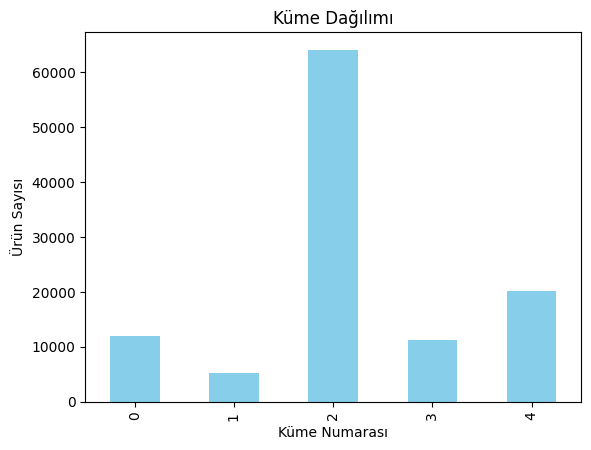

In [40]:
df["Kume"].value_counts().sort_index().plot(kind="bar", color="skyblue")  #Küme sayılarını bar grafikte göster
plt.title("Küme Dağılımı")  #Grafik başlığı
plt.xlabel("Küme Numarası")  #X ekseni başlığı
plt.ylabel("Ürün Sayısı")  #Y ekseni başlığı
plt.show()  #Grafiği çiz

Küme 2, en fazla ürünü içeren kümedir (yaklaşık 65.000 ürün)

Diğer kümelere göre daha fazla başlık ortak yapıya sahiptir bu da benzer başlıkların yoğun olduğu bir grubu gösterir

Küme 1, en az ürüne sahip gruptur

Küme dağılımı dengeli değildir bu da ürün başlıklarının bazı kategorilerde yoğunlaştığını gösterir

Kümeleme sonuçları veri setindeki bazı ürünlerin benzer kelime yapılarında toplandığını göstermektedir

In [43]:
!pip install -q sentence-transformers
#Bu kütüphane hazır anlam çıkaran cümle modellerini içinde barındırır

In [44]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
#Küçük ve hızlı bir model seçiyoruz

titles = df["title"].dropna().astype(str)
#Boş olmayan başlıkları al

embeddings = model.encode(titles.tolist(), show_progress_bar=True)
#Başlıkları sayısal vektörlere dönüştür (embedding)
#Her başlığı 384 uzunlukta bir vektöre dönüştürür
#Her satır artık "anlamlı sayılardan oluşan bir dizi" haline gelir

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3519 [00:00<?, ?it/s]

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
#n_clusters=5 ile 5 tane grup oluşturalım

clusters = kmeans.fit_predict(embeddings)
#fit_predict ile her başlığın hangi gruba ait olduğunu yazar.

df["Kume_Embed"] = clusters
#Küme numaralarını dataframe'e ekleyelim

In [46]:
for i in range(5):
    print(f"\nKüme {i} Örnekleri:\n")
    print(df[df["Kume_Embed"] == i]["title"].sample(5, random_state=42).to_string(index=False))

#Her kümeden 5 başlık örneği alıyoruz
#Böylece kümelerin anlamlı olup olmadığını kontrol ediyoruz


Küme 0 Örnekleri:

ELISHEVA Lace Front Wigs Human Hair Body Wave N...
Sidaila Long Curly Wigs Synthetic Glueless Natu...
Namecute Long Kinky Wig Black Highlight Brown W...
613 Ombre Lace Front Wig Human Hair Highlight L...
Ms. Spot Wig,Women's Dalmatian Diva Cruella Dal...

Küme 1 Örnekleri:

Colonia Mirra EDC Concentree by Acqua Di Parma ...
      Bronzing Powder Amber Natural Organic Makeup
Tata Harper Refreshing Cleanser, Gentle Chemica...
Intimate Lightning Cream - Pretty Privates - Na...
  2pck - Fresh Picked Apple Hand Soap 13.5 fl. oz.

Küme 2 Örnekleri:

Lookatool Single-head Rotary Brake Eyebrow Last...
Eyelashes with Glue, 3 Pairs Natural False Eyel...
WolfGo Eyelash Extension Cup - 10 Plastic Eyela...
   Femme Couture Rose All Day Foundation Fair Fair
Ice Roller for Face, Diamond Ice Face Roller Sk...

Küme 3 Örnekleri:

Tropical Shine Jumbo 707080 Washable Zebra 80 C...
Fog Free 2 Piece Shower Mirror | Mounts on Show...
Kercisbeauty 2PCS Unisex Lotus and Bee Suit Bro...
Gi

Küme 0: Saç/wig ürünleri yoğunlukta. Model, başlıkların benzerliğini başarılı şekilde yakalamış

Küme 1: Cilt bakımı, sabun ve parfüm gibi kozmetik ürünler ön planda

Küme 2: Göz makyajı, fondöten, yüz güzellik ürünleri bir arada

Küme 3: Karışık ama içinde çocuk ürünleri, ev ürünleri ve kişisel bakım araçları bulunuyor

Küme 4: Bandana, saç tokası gibi saç aksesuarlarına odaklanmış

Sentence-transformer tabanlı embedding, başlıklar arası anlam benzerliğini daha iyi yakalayarak daha tutarlı kümeler oluşturmuş

Bu yöntem, TF-IDF'e kıyasla daha yüksek anlamsal gruplanma başarısı sağlamaktadır

Gruplar tematik olarak ayrılmış ve daha odaklı hale gelmiş

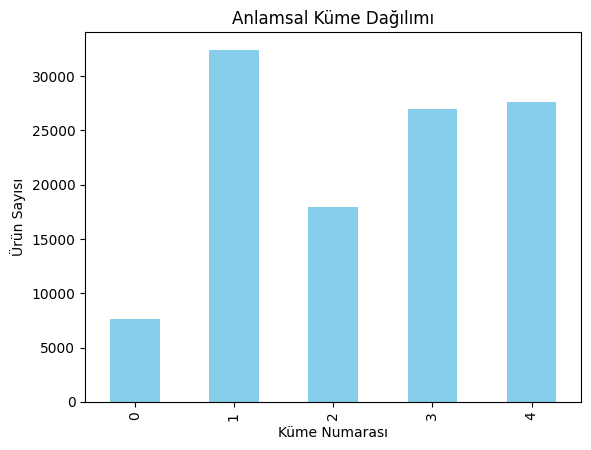

In [47]:
import matplotlib.pyplot as plt

df["Kume_Embed"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Anlamsal Küme Dağılımı")
plt.xlabel("Küme Numarası")
plt.ylabel("Ürün Sayısı")
plt.show()

#Bu grafik bize hangi kümede kaç ürün olduğunu gösterir

Kümeler dengeli bir şekilde dağılmış gibi görünse de Küme 1'deki ürün sayısı diğer kümelere göre belirgin şekilde daha fazla

Küme 0 ise en az ürüne sahip küme, bu durum o grubun daha spesifik ya da nadir ürün başlıklarını içerdiğini gösterebilir

Bu dağılım sentence-transformer tabanlı embedding modelinin ürünleri anlam benzerliğine göre başarılı bir şekilde ayırdığını gösteriyor

Kümelerin büyüklük farkları bazı ürün gruplarının (örneğin kozmetik, saç ürünleri) veri setinde daha yoğun temsil edildiğini ortaya koyuyor